In [2]:
!pip install playwright asyncio beautifulsoup4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 6.9 MB/s eta 0:00:00


In [1]:
!playwright install

167.7 MiB [] 0% 0.0s167.7 MiB [] 0% 165.3s167.7 MiB [] 0% 20.2s167.7 MiB [] 0% 13.5s167.7 MiB [] 0% 11.3s167.7 MiB [] 0% 8.7s167.7 MiB [] 1% 8.6s167.7 MiB [] 1% 8.3s167.7 MiB [] 1% 7.0s167.7 MiB [] 2% 6.1s167.7 MiB [] 2% 5.8s167.7 MiB [] 3% 5.2s167.7 MiB [] 4% 4.7s167.7 MiB [] 4% 4.5s167.7 MiB [] 5% 4.4s167.7 MiB [] 5% 4.2s167.7 MiB [] 6% 4.4s167.7 MiB [] 6% 4.6s167.7 MiB [] 6% 4.5s167.7 MiB [] 7% 4.4s167.7 MiB [] 7% 4.6s167.7 MiB [] 8% 4.5s167.7 MiB [] 8% 4.6s167.7 MiB [] 9% 4.7s167.7 MiB [] 9% 4.5s167.7 MiB [] 10% 4.4s167.7 MiB [] 11% 4.2s167.7 MiB [] 11% 4.3s167.7 MiB [] 12% 4.2s167.7 MiB [] 13% 4.1s167.7 MiB [] 14% 4.1s167.7 MiB [] 14% 4.0s167.7 MiB [] 15% 4.0s167.7 MiB [] 15% 3.9s167.7 MiB [] 16% 3.8s167.7 MiB [] 16% 3.9s167.7 MiB [] 17% 3.9s167.7 MiB [] 18% 3.8s167.7 MiB [] 19% 3.6s167.7 MiB [] 19% 3.5s167.7 MiB [] 20% 3.5s167.7 MiB [] 21% 3.4s167.7 MiB [] 22% 3.4s167.7 MiB [] 23% 3.3s167.7 MiB [] 23% 3.4s167.7 MiB [] 24% 3.4s167.7 MiB [] 25% 3.2s167.7 MiB [] 26% 3.2s167.7 MiB []

In [53]:
url = 'https://www.sofascore.com/football/match/wisla-plock-wisla-krakow/lmbsxmb#id:12420876'

match_id = url.split('id:')[-1]

In [54]:
match_id

'12420876'

In [55]:
import json
from playwright.async_api import async_playwright
from bs4 import BeautifulSoup

In [56]:
async def main():
    async with async_playwright() as p:
        browser = await p.chromium.launch()
        page = await browser.new_page()
        await page.goto(f'https://www.sofascore.com/api/v1/event/{match_id}/shotmap')
        content = await page.content()
        soup = BeautifulSoup(content, 'html.parser')
        data = json.loads(soup.select_one('pre').text)['shotmap']
        await browser.close()

        return data

In [57]:
result = await main()

In [58]:
result

[{'player': {'name': 'Gleb Kuchko',
   'firstName': '',
   'lastName': '',
   'slug': 'gleb-kuchko',
   'shortName': 'G. Kuchko',
   'position': 'F',
   'jerseyNumber': '91',
   'userCount': 36,
   'id': 1436340,
   'fieldTranslations': {'nameTranslation': {'ar': 'غليب كوتشكو',
     'hi': 'ग्लेब कुचको',
     'bn': 'গ্লেব কুচকো'},
    'shortNameTranslation': {'ar': 'غ. كوتشكو',
     'hi': 'जी. कुचको',
     'bn': 'জি. কুচকো'}}},
  'isHome': False,
  'shotType': 'goal',
  'goalType': 'regular',
  'situation': 'regular',
  'playerCoordinates': {'x': 7, 'y': 57, 'z': 0},
  'bodyPart': 'right-foot',
  'goalMouthLocation': 'high-right',
  'goalMouthCoordinates': {'x': 0, 'y': 46.5, 'z': 21.4},
  'xg': 0.4446,
  'xgot': 0.6569,
  'id': 4868774,
  'time': 90,
  'addedTime': 5,
  'timeSeconds': 5659,
  'draw': {'start': {'x': 57, 'y': 7},
   'end': {'x': 53.5, 'y': 0},
   'goal': {'x': 53.5, 'y': 78.6}},
  'reversedPeriodTime': 1,
  'reversedPeriodTimeSeconds': 641,
  'periodTimeSeconds': 259,
 

In [59]:
import pandas as pd

df = pd.DataFrame(result)

In [60]:
df.head()

,player,isHome,shotType,goalType,situation,playerCoordinates,bodyPart,goalMouthLocation,goalMouthCoordinates,xg,...,id,time,addedTime,timeSeconds,draw,reversedPeriodTime,reversedPeriodTimeSeconds,periodTimeSeconds,incidentType,blockCoordinates
0,"{'name': 'Gleb Kuchko', 'firstName': '', 'last...",False,goal,regular,regular,"{'x': 7, 'y': 57, 'z': 0}",right-foot,high-right,"{'x': 0, 'y': 46.5, 'z': 21.4}",0.44460,...,4868774,90,5.0,5659,"{'start': {'x': 57, 'y': 7}, 'end': {'x': 53.5...",1,641,259,shot,NaN
1,"{'name': 'James Igbekeme', 'slug': 'james-igbe...",True,miss,NaN,regular,"{'x': 22, 'y': 51, 'z': 0}",left-foot,close-right,"{'x': 0, 'y': 42.8, 'z': 17}",0.01817,...,4868773,90,3.0,5567,"{'start': {'x': 51, 'y': 22}, 'end': {'x': 57....",1,733,167,shot,NaN
2,"{'name': 'Marko Poletanović', 'slug': 'marko-p...",True,block,NaN,regular,"{'x': 17, 'y': 61, 'z': 0}",right-foot,low-centre,"{'x': 0, 'y': 50, 'z': 20}",0.02902,...,4868772,90,3.0,5560,"{'start': {'x': 61, 'y': 17}, 'block': {'x': 6...",1,740,160,shot,"{'x': 17, 'y': 61, 'z': 0}"
3,"{'name': 'Ángel Rodado', 'slug': 'angel-rodado...",True,miss,NaN,regular,"{'x': 8, 'y': 58, 'z': 0}",right-foot,close-right,"{'x': 0, 'y': 42.8, 'z': 3.5}",0.23150,...,4868771,85,NaN,5063,"{'start': {'x': 58, 'y': 8}, 'end': {'x': 57.2...",6,337,2363,shot,NaN
4,"{'name': 'Marko Poletanović', 'slug': 'marko-p...",True,save,NaN,set-piece,"{'x': 28, 'y': 40, 'z': 0}",right-foot,low-left,"{'x': 0, 'y': 52.7, 'z': 9.6}",0.07490,...,4868770,84,NaN,5024,"{'start': {'x': 40, 'y': 28}, 'end': {'x': 47....",7,376,2324,shot,NaN


In [61]:
df.columns

Index(['player', 'isHome', 'shotType', 'goalType', 'situation',
       'playerCoordinates', 'bodyPart', 'goalMouthLocation',
       'goalMouthCoordinates', 'xg', 'xgot', 'id', 'time', 'addedTime',
       'timeSeconds', 'draw', 'reversedPeriodTime',
       'reversedPeriodTimeSeconds', 'periodTimeSeconds', 'incidentType',
       'blockCoordinates'],
      dtype='object')

In [62]:
home_team = 'Wisła Kraków'
away_team = 'Wisła Płock'

In [63]:
df['team_name'] = df['isHome'].map({True: home_team, False: away_team})

In [64]:
df['shotType'].unique()

array(['goal', 'miss', 'block', 'save'], dtype=object)

In [65]:
df['goalType'].unique()  #tutaj będziemy wykluczać jeżeli gol był z karnego aby nie zaburzać obrazu

array(['regular', nan, 'penalty'], dtype=object)

In [66]:
df['goalType'].count()

np.int64(4)

In [67]:
df['goalType'].value_counts(dropna=False) #regular oznacza, gole padajace z normalnie sytuacji

,count
goalType,
NaN,25
regular,3
penalty,1


In [68]:
df['incidentType'].unique()

array(['shot'], dtype=object)

In [70]:
df = df[['team_name', 'player', 'playerCoordinates', 'shotType', 'xg', 'incidentType', 'goalType']]

In [71]:
df.head()

,team_name,player,playerCoordinates,shotType,xg,incidentType,goalType
0,Wisła Płock,"{'name': 'Gleb Kuchko', 'firstName': '', 'last...","{'x': 7, 'y': 57, 'z': 0}",goal,0.44460,shot,regular
1,Wisła Kraków,"{'name': 'James Igbekeme', 'slug': 'james-igbe...","{'x': 22, 'y': 51, 'z': 0}",miss,0.01817,shot,NaN
2,Wisła Kraków,"{'name': 'Marko Poletanović', 'slug': 'marko-p...","{'x': 17, 'y': 61, 'z': 0}",block,0.02902,shot,NaN
3,Wisła Kraków,"{'name': 'Ángel Rodado', 'slug': 'angel-rodado...","{'x': 8, 'y': 58, 'z': 0}",miss,0.23150,shot,NaN
4,Wisła Kraków,"{'name': 'Marko Poletanović', 'slug': 'marko-p...","{'x': 28, 'y': 40, 'z': 0}",save,0.07490,shot,NaN


In [72]:
df = df[df['goalType'] != 'penalty']

In [75]:
df.head()

,team_name,player,playerCoordinates,shotType,xg,incidentType,goalType,x,y,z
0,Wisła Płock,"{'name': 'Gleb Kuchko', 'firstName': '', 'last...","{'x': 7, 'y': 57, 'z': 0}",goal,0.44460,shot,regular,7,57,0
1,Wisła Kraków,"{'name': 'James Igbekeme', 'slug': 'james-igbe...","{'x': 22, 'y': 51, 'z': 0}",miss,0.01817,shot,NaN,22,51,0
2,Wisła Kraków,"{'name': 'Marko Poletanović', 'slug': 'marko-p...","{'x': 17, 'y': 61, 'z': 0}",block,0.02902,shot,NaN,17,61,0
3,Wisła Kraków,"{'name': 'Ángel Rodado', 'slug': 'angel-rodado...","{'x': 8, 'y': 58, 'z': 0}",miss,0.23150,shot,NaN,8,58,0
4,Wisła Kraków,"{'name': 'Marko Poletanović', 'slug': 'marko-p...","{'x': 28, 'y': 40, 'z': 0}",save,0.07490,shot,NaN,28,40,0


In [74]:
df[['x', 'y', 'z']] = df['playerCoordinates'].apply(pd.Series)

In [83]:
pip install mplsoccer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 2.6 MB/s eta 0:00:00


Text(90, 86, 'Wisła Płock')

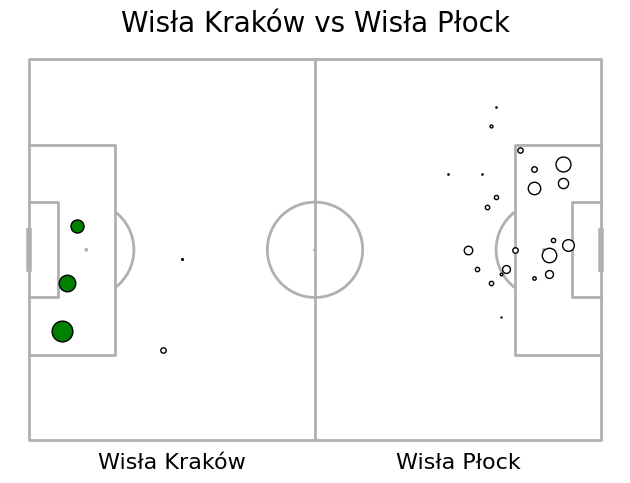

In [87]:
from mplsoccer import Pitch

pitch = Pitch(pitch_type='statsbomb')
fig, ax = pitch.draw()

for x in df.to_dict(orient='records'):
  if x['team_name'] == 'Wisła Kraków':
    pitch.scatter(x=120-x['x'], y=80-x['y'], ax=ax, s=500*x['xg'], ec='black', c='green' if x['shotType'] == 'goal' else 'white')
  else:
    pitch.scatter(x=x['x'], y=x['y'], ax=ax, s=500*x['xg'], ec='black', c='green' if x['shotType'] == 'goal' else 'white')


ax.set_title('Wisła Kraków vs Wisła Płock', fontsize=20)
ax.text(30, 86, 'Wisła Kraków', ha='center', fontsize = 16)
ax.text(90, 86, 'Wisła Płock', ha='center', fontsize = 16)